<h1>WEB SCRAPING – ASSIGNMENT 1</h1>

<img src="https://www.screenscraping.info/i/side2.jpg">


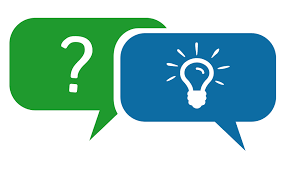

Importing libraries required

In [1]:
import requests
from bs4 import BeautifulSoup

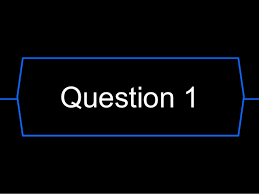

<h3>Write a python program to display all the header tags from ‘en.wikipedia.org/wiki/Main_Page’</h3>

In [2]:
URL = 'https://en.wikipedia.org/wiki/Main_Page'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
titles = soup.find_all(['h1', 'h2','h3'])
print('List of all the header tags :', *titles, sep='\n\n')

List of all the header tags :

<h1 class="firstHeading" id="firstHeading" lang="en">Main Page</h1>

<h2 class="mp-h2" id="mp-tfa-h2"><span id="From_today.27s_featured_article"></span><span class="mw-headline" id="From_today's_featured_article">From today's featured article</span></h2>

<h2 class="mp-h2" id="mp-dyk-h2"><span class="mw-headline" id="Did_you_know_...">Did you know ...</span></h2>

<h2 class="mp-h2" id="mp-itn-h2"><span class="mw-headline" id="In_the_news">In the news</span></h2>

<h2 class="mp-h2" id="mp-otd-h2"><span class="mw-headline" id="On_this_day">On this day</span></h2>

<h2 class="mp-h2" id="mp-tfp-h2"><span id="Today.27s_featured_picture"></span><span class="mw-headline" id="Today's_featured_picture">Today's featured picture</span></h2>

<h2 class="mp-h2" id="mp-other"><span class="mw-headline" id="Other_areas_of_Wikipedia">Other areas of Wikipedia</span></h2>

<h2 class="mp-h2" id="mp-sister"><span id="Wikipedia.27s_sister_projects"></span><span class="mw-headl

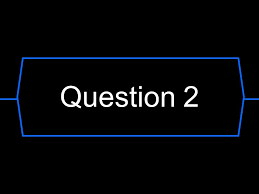

<h3>Write a python program to display IMDB’s Top rated 100 movies’ data (i.e. Name, IMDB rating, Year of
release) and save it in form of a CSV file.</h3>

In [3]:
URL = 'https://www.imdb.com/list/ls091520106/'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

Movie_Name=[]
IMDB_Rating=[]
Year_of_Release=[]

name=soup.find_all('h3', class_="lister-item-header")
for x in name:
    for y in x.find_all('a'):
        Movie_Name.append(y.text)

for i in soup.find_all('div',class_='ipl-rating-star small'):
    for j in i.find_all('span',class_='ipl-rating-star__rating'):
        IMDB_Rating.append(j.text)
        
for z in name:
    for k in z.find_all('span',class_='lister-item-year text-muted unbold'):
        Year_of_Release.append(k.text)         

        
import pandas as pd
df= pd.DataFrame({'Movie Name': Movie_Name, 'IMDB Rating': IMDB_Rating, 'Year of Release': Year_of_Release})
df

,Movie Name,IMDB Rating,Year of Release
0,The Shawshank Redemption,9.3,(1994)
1,The Godfather,9.2,(1972)
2,The Godfather: Part II,9,(1974)
3,The Dark Knight,9,(2008)
4,12 Angry Men,9,(1957)
...,...,...,...
95,North by Northwest,8.3,(1959)
96,A Clockwork Orange,8.3,(1971)
97,Snatch,8.3,(2000)
98,Amélie,8.3,(2001)


Saving to csv file

In [4]:
df.to_csv('IMDB_TOP_100.csv')

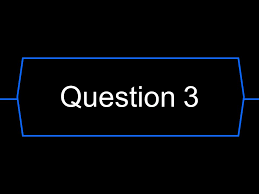

<h3>Write a python program to display IMDB’s Top rated 100 Indian movies’ data (i.e. Name, IMDB rating, Year
of release) and save it in form of a CSV file. </h3>

In [5]:
URL = 'https://www.imdb.com/india/top-rated-indian-movies/'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

Movie_Name=[]
IMDB_Rating=[]
Year_of_Release=[]

name=soup.find_all('td', class_="titleColumn")
for x in name:
    for y in x.find_all('a'):
        Movie_Name.append(y.text)

for i in soup.find_all('td',class_="ratingColumn imdbRating"):
    for j in i.find_all('strong'):
        IMDB_Rating.append(j.text)
        
for z in name:
    for k in z.find_all('span',class_='secondaryInfo'):
        Year_of_Release.append(k.text)         

        
import pandas as pd
df= pd.DataFrame({'Movie Name': Movie_Name, 'IMDB Rating': IMDB_Rating, 'Year of Release': Year_of_Release})
df=df[0:100]

In [6]:
df

,Movie Name,IMDB Rating,Year of Release
0,Pather Panchali,8.5,(1955)
1,Ratsasan,8.5,(2018)
2,Gol Maal,8.5,(1979)
3,Nayakan,8.5,(1987)
4,Anbe Sivam,8.5,(2003)
...,...,...,...
95,Maqbool,8.0,(2003)
96,Bombay,8.0,(1995)
97,Omkara,8.0,(2006)
98,Section 375,8.0,(2019)


Saving to csv file

In [7]:
df.to_csv('IMDB_TOP_100_Indian.csv')

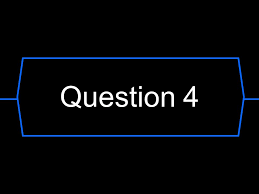

<h3> Write a python program to scrap book name, author name, genre and book review of any 5 books from
‘www.bookpage.com’</h3>

In [8]:
URL = 'https://bookpage.com/reviews'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

Book_Name=[]
Author_Name=[]
Genre=[]
Book_Review=[]

name=soup.find_all('h4', class_="italic")
for x in name:
    for y in x.find_all('a'):
        Book_Name.append(y.text)
        
for i in soup.find_all('p', class_="sans bold"):
        Author_Name.append(i.text)
        
for z in soup.find_all('p',class_="genre-links hidden-phone"):
    for k in z.find_all('a'):
        Genre.append(k.text) 
        
for o in soup.find_all('p',class_="excerpt"):
        Book_Review.append(o.text)  

df= pd.DataFrame({'Book Name': Book_Name[0:5], 'Author Name': Author_Name[0:5], 'Genre': Genre[0:5],'Book Review': Book_Review[0:5]})
df

,Book Name,Author Name,Genre,Book Review
0,Operation Moonglow,\nTeasel Muir-Harmony\n,Nonfiction,"\nIn 1957, Sputnik went up, and America panick..."
1,"Dolly Parton, Songteller",\nDolly Parton\n,History,"\nIn Dolly Parton, Songteller: My Life in Lyri..."
2,The Thirty Names of Night,\nZeyn Joukhadar\n,Politics,"\nIn modern-day New York City, a trans boy in ..."
3,In Search of a Name,"\nMarjolijn van Heemstra, Jonathan Reeder\n",Nonfiction,"\nDuring the months when a baby is on the way,..."
4,"Share Some Kindness, Bring Some Light",\nApryl Stott\n,Biography & Memoir,"\nTogether, Bear and Coco embark on a journey ..."


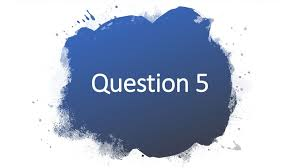

<h3>Write a python program to scrape cricket rankings from ‘www.icc-cricket.com’. You have to scrape:</h3>

<h3> i) Top 10 ODI teams in men’s cricket along with the records for matches, points and rating.</h3>

In [9]:
URL = 'https://www.icc-cricket.com/rankings/mens/team-rankings/odi'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

Team=[]
Combo=[]
Matches=[]
Points=[]
Rating=[]

for x in soup.find_all('span', class_="u-hide-phablet"):
    Team.append(x.text)

for i in soup.find_all('td', class_="rankings-block__banner--matches"):
    Combo.append(i.text)
for i in soup.find_all('td',class_='rankings-block__banner--points'):
    Combo.append(i.text)
for i in soup.find_all('td',class_="table-body__cell u-center-text"):
    Combo.append(i.text)
    
for i in range(0, len(Combo)): 
    if i % 2: 
        Points.append(Combo[i]) 
    else : 
        Matches.append(Combo[i]) 

    
for i in soup.find_all('td', class_="rankings-block__banner--rating u-text-right"):
    Rating.append(i.text)
for i in soup.find_all('td',class_="table-body__cell u-text-right rating"):
    Rating.append(i.text)
Rating[0]=Rating[0].replace(' ','')
Rating[0]=Rating[0].replace('\n','')

df= pd.DataFrame({'Team': Team[0:10], 'Matches': Matches[0:10], 'Points': Points[0:10],'Rating': Rating[0:10]})
df

,Team,Matches,Points,Rating
0,England,44,"5,405",123
1,India,50,"5,878",118
2,New Zealand,32,"3,716",116
3,Australia,37,"4,110",111
4,South Africa,31,"3,345",108
5,Pakistan,35,"3,590",103
6,Bangladesh,34,"2,989",88
7,Sri Lanka,39,"3,297",85
8,West Indies,43,"3,285",76
9,Afghanistan,28,"1,549",55


<h3>ii) Top 10 ODI Batsmen in men along with the records of their team and rating. </h3>


In [10]:
URL = 'https://www.icc-cricket.com/rankings/mens/player-rankings/odi'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

Batsmen=[]
X=[]
Y=[]
Z=[]
Team=[]
Rating=[]


for i in soup.find_all('div', class_="rankings-block__banner--name"):
    X.append(i.text)
Batsmen.append(X[0])
for z in soup.find_all('td',class_="table-body__cell name"):
    for k in z.find_all('a'):
        Batsmen.append(k.text)

for i in soup.find_all('div', class_="rankings-block__banner--nationality"):
    Y.append(i.text)
Team.append(Y[0])
for z in soup.find_all('span',class_="table-body__logo-text"):
        Team.append(z.text)
Team[0]=Team[0].replace('\n','')

for i in soup.find_all('div',class_="rankings-block__banner--rating"):
    Z.append(i.text)
Rating.append(Z[0])
for z in soup.find_all('td',class_="table-body__cell u-text-right rating"):
        Rating.append(z.text)
        
df= pd.DataFrame({'Batsmen': Batsmen[0:10], 'Team': Team[0:10],'Rating': Rating[0:10]})
df

,Batsmen,Team,Rating
0,Virat Kohli,IND,871
1,Rohit Sharma,IND,855
2,Babar Azam,PAK,837
3,Ross Taylor,NZ,818
4,Francois du Plessis,SA,790
5,Kane Williamson,NZ,765
6,Aaron Finch,AUS,762
7,David Warner,AUS,759
8,Quinton de Kock,SA,755
9,Jonny Bairstow,ENG,754


<h3>iii) Top 10 ODI bowlers along with the records of their team and rating.</h3>

In [11]:
URL = 'https://www.icc-cricket.com/rankings/mens/player-rankings/odi'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

Bowlers=[]
X=[]
Y=[]
Z=[]
Team_B=[]
Rating_B=[]


for i in soup.find_all('div', class_="rankings-block__banner--name"):
    X.append(i.text)
Bowlers.append(X[1])
Bowlers.extend(Batsmen[10:19])

for i in soup.find_all('div', class_="rankings-block__banner--nationality"):
    Y.append(i.text)
Team_B.append(Y[1])
Team_B.extend(Team[10:19])
Team_B[0]=Team_B[0].replace('\n','')

for i in soup.find_all('div',class_="rankings-block__banner--rating"):
    Z.append(i.text)
Rating_B.append(Z[1])
Rating_B.extend(Rating[10:19])
        
df= pd.DataFrame({'Bowlers': Bowlers, 'Team': Team_B,'Rating': Rating_B})
df

,Bowlers,Team,Rating
0,Trent Boult,NZ,722
1,Jasprit Bumrah,IND,719
2,Mujeeb Ur Rahman,AFG,701
3,Chris Woakes,ENG,675
4,Kagiso Rabada,SA,665
5,Pat Cummins,AUS,659
6,Josh Hazlewood,AUS,654
7,Mohammad Amir,PAK,647
8,Matt Henry,NZ,641
9,Jofra Archer,ENG,637


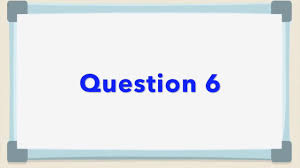

<h3>Write a python program to scrape cricket rankings from ‘www.icc-cricket.com’. You have to scrape:</h3>

<h3>i) Top 10 ODI teams in women’s cricket along with the records for matches, points and rating. </h3>

In [12]:
URL = 'https://www.icc-cricket.com/rankings/womens/team-rankings/odi'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

Team=[]
Combo=[]
Matches=[]
Points=[]
Rating=[]

for x in soup.find_all('span', class_="u-hide-phablet"):
    Team.append(x.text)

for i in soup.find_all('td', class_="rankings-block__banner--matches"):
    Combo.append(i.text)
for i in soup.find_all('td',class_='rankings-block__banner--points'):
    Combo.append(i.text)
for i in soup.find_all('td',class_="table-body__cell u-center-text"):
    Combo.append(i.text)
    
for i in range(0, len(Combo)): 
    if i % 2: 
        Points.append(Combo[i]) 
    else : 
        Matches.append(Combo[i]) 

    
for i in soup.find_all('td', class_="rankings-block__banner--rating u-text-right"):
    Rating.append(i.text)
for i in soup.find_all('td',class_="table-body__cell u-text-right rating"):
    Rating.append(i.text)
Rating[0]=Rating[0].replace(' ','')
Rating[0]=Rating[0].replace('\n','')

df= pd.DataFrame({'Team': Team[0:10], 'Matches': Matches[0:10], 'Points': Points[0:10],'Rating': Rating[0:10]})
df

,Team,Matches,Points,Rating
0,Australia,15,"2,436",162
1,India,15,"1,812",121
2,England,14,"1,670",119
3,South Africa,16,"1,713",107
4,New Zealand,15,"1,384",92
5,West Indies,12,"1,025",85
6,Pakistan,12,927,77
7,Bangladesh,5,306,61
8,Sri Lanka,11,519,47
9,Ireland,2,25,13


<h3>ii) Top 10 women’s ODI players along with the records of their team and rating. </h3>

In [13]:
URL = 'https://www.icc-cricket.com/rankings/womens/player-rankings/odi'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

Batswomen=[]
X=[]
Y=[]
Z=[]
Team=[]
Rating=[]


for i in soup.find_all('div', class_="rankings-block__banner--name"):
    X.append(i.text)
Batswomen.append(X[0])
for z in soup.find_all('td',class_="table-body__cell name"):
    for k in z.find_all('a'):
        Batswomen.append(k.text)

for i in soup.find_all('div', class_="rankings-block__banner--nationality"):
    Y.append(i.text)
Team.append(Y[0])
for z in soup.find_all('span',class_="table-body__logo-text"):
        Team.append(z.text)
Team[0]=Team[0].replace('\n','')

for i in soup.find_all('div',class_="rankings-block__banner--rating"):
    Z.append(i.text)
Rating.append(Z[0])
for z in soup.find_all('td',class_="table-body__cell u-text-right rating"):
        Rating.append(z.text)
        
df= pd.DataFrame({'Batswomen': Batswomen[0:10], 'Team': Team[0:10],'Rating': Rating[0:10]})
df

,Batswomen,Team,Rating
0,Meg Lanning,AUS,749
1,Stafanie Taylor,WI,746
2,Alyssa Healy,AUS,741
3,Smriti Mandhana,IND,732
4,Amy Satterthwaite,NZ,723
5,Tammy Beaumont,ENG,716
6,Ellyse Perry,AUS,691
7,Lizelle Lee,SA,690
8,Laura Wolvaardt,SA,689
9,Mithali Raj,IND,687


<h3>iii) Top 10 women’s ODI all-rounder along with the records of their team and rating.</h3>

In [14]:
URL = 'https://www.icc-cricket.com/rankings/womens/player-rankings/odi'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

All_rounder=[]
X=[]
Y=[]
Z=[]
Team_B=[]
Rating_B=[]


for i in soup.find_all('div', class_="rankings-block__banner--name"):
    X.append(i.text)
All_rounder.append(X[2])
All_rounder.extend(Batswomen[20:29])

for i in soup.find_all('div', class_="rankings-block__banner--nationality"):
    Y.append(i.text)
Team_B.append(Y[1])
Team_B.extend(Team[20:29])
Team_B[0]=Team_B[0].replace('\n','')

for i in soup.find_all('div',class_="rankings-block__banner--rating"):
    Z.append(i.text)
Rating_B.append(Z[1])
Rating_B.extend(Rating[20:29])
        
df= pd.DataFrame({'All-rounders': All_rounder, 'Team': Team_B,'Rating': Rating_B})
df

,All-rounders,Team,Rating
0,Ellyse Perry,AUS,804
1,Marizanne Kapp,SA,389
2,Deepti Sharma,IND,359
3,Dane van Niekerk,SA,335
4,Jess Jonassen,AUS,301
5,Sophie Devine,NZ,289
6,Natalie Sciver,ENG,273
7,Shikha Pandey,IND,250
8,Katherine Brunt,ENG,232


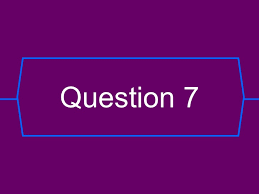

<h3>Write a python program to scrape details of all the mobile phones under Rs. 20,000 listed on Amazon.in. The
scraped data should include Product Name, Price, Image URL and Average Rating.</h3>

In [15]:
URL = 'https://www.amazon.in/s?k=android+mobiles&rh=p_36%3A-2000000&adgrpid=61774211920&ext_vrnc=hi&gclid=Cj0KCQiAh4j-BRCsARIsAGeV12BIy7JeohVddz-wT2QENhToqRajFrlOWA9WvrZF4UmufuE1Q7iOrkQaAqvGEALw_wcB&hvadid=382188745145&hvdev=c&hvlocphy=9062056&hvnetw=g&hvqmt=b&hvrand=4211392695178216060&hvtargid=kwd-313862379054&hydadcr=24569_1955344&qid=1606579777&rnid=1318502031&tag=googinhydr1-21&ref=sr_nr_p_36_5'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

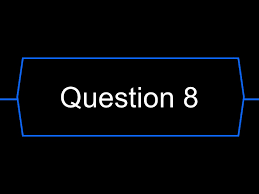

<h3>Write a python program to extract information about the local weather from the National Weather Service
website of USA, https://www.weather.gov/ for the city, San Francisco. You need to extract data about 7 day
extended forecast display for the city. The data should include period, short description, temperature and
description. </h3>

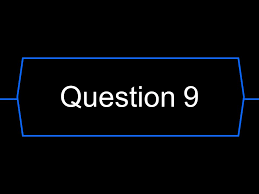

<h3>Write a python program to scrape ‘software developer’ job listings from ‘Monster.com’. It should include all
the jobs listed for the next 5 pages. </h3>

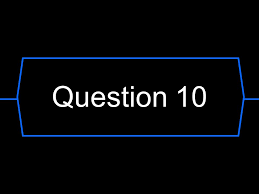

<h3>Write a python program to scrape ‘data scientist’ job listings for location ‘New Delhi’ from ‘Monster.com’. It
should include all the jobs listed for the next 5 pages.</h3>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAPO_bLwVPtHaUTpU5w9p8QB0wOuqPxo2OJw&usqp=CAU" width='500'>